In [71]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math

In [2]:
def assign_clusters(X, centers, i):
    if i == 0:
        return np.array([np.argmin(np.linalg.norm(x - centers, axis=1)) for x in X])  # евклидово расстояние
    if i == 1:
        return np.array([np.argmin(np.sum(np.abs(x - centers), axis=1)) for x in X])  # манхэттенское расстояние

In [3]:
def move_centers(X, k, clusters, centers):
    new_centers = np.zeros_like(centers)
    for i in range(k):
        cluster = X[clusters == i]
        if not len(cluster):
            continue
        new_centers[i] = np.mean(cluster, axis=0)
    return new_centers

In [13]:
def KMeans(X, k, centers, i):
    clusters = assign_clusters(X, centers, i)
    iter_ = 0
    clusters_equal = False
    while not clusters_equal:
        clusters = assign_clusters(X, centers, i)
        new_centers = move_centers(X, k, clusters, centers)
        clusters_equal = (clusters == assign_clusters(X, new_centers, i)).all()
        centers = new_centers
        iter_ = iter_ + 1
    return centers, clusters, iter_

Количество итераций: 10


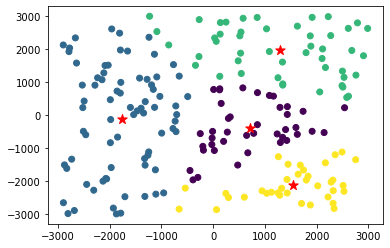

Количество итераций: 6


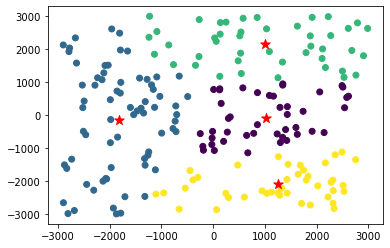

Количество итераций: 4


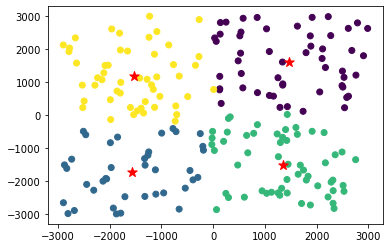

Количество итераций: 4


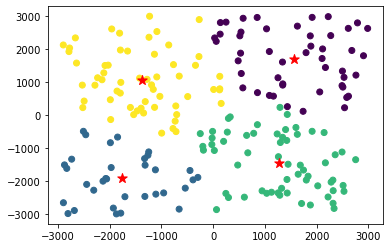

In [53]:
N = 200
k = 4
X = np.array([(random.uniform(-3000, 3000), random.uniform(-3000, 3000)) for i in range(N)])
centers = np.zeros((k, 2))
for i in range(2):
    if i == 0:
        centers = X[np.random.choice(len(X), k)]
    if i == 1:
        centers = np.array([(max(X[:, 0]), max(X[:, 1])), (min(X[:, 0]), min(X[:, 1])), (max(X[:, 0]), min(X[:, 1])),
                            (min(X[:, 0]), max(X[:, 1]))])
    for j in range(2):
        centers, clusters, iter_ = KMeans(X, k, centers, j)
        print("Количество итераций:", iter_)
        fig, axs = plt.subplots()
        axs.scatter(X[:, 0], X[:, 1], c=clusters)
        axs.scatter(centers[:, 0], centers[:, 1], c='red', marker='*', s=100)
        plt.show()


In [117]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples = 400, centers = 4, cluster_std = 0.60, random_state = 0)

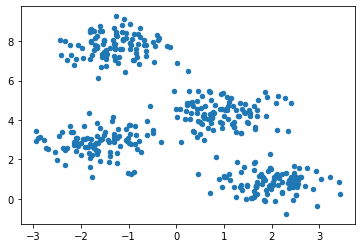

In [118]:
plt.scatter(X[:, 0], X[:, 1], s = 20);
plt.show()

In [119]:
def dist_ev(X, k):
    centers = np.zeros((k, 2))
    centers = X[np.random.choice(len(X), k)]
    #centers = np.array([(max(X[:, 0]), max(X[:, 1])), (min(X[:, 0]), min(X[:, 1])), (max(X[:, 0]), min(X[:, 1])),
                                #(min(X[:, 0]), max(X[:, 1]))])
    j=0 #евклидово расстояние
    centers, clusters, iter_ = KMeans(X, k, centers, j)
    distance = 0
    for i in range(X.shape[0]):
        distance = distance + math.sqrt((X[i, 0] -centers[clusters[i], 0])**2 + (X[i, 1]-centers[clusters[i], 1])**2)
    return distance  

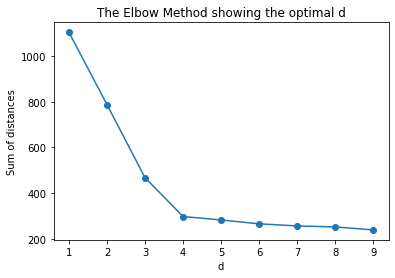

In [120]:
k = range(1, 10)
plt.plot(k, [dist_ev(X, k) for k in range(1, 10)], marker='o')
plt.xlabel('d')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal d')
plt.show()

Количество итераций: 11


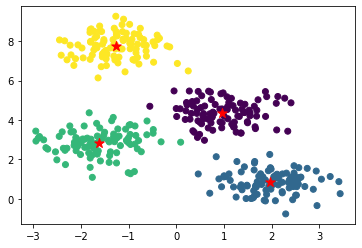

In [122]:
k = 4
centers = np.zeros((k, 2))
centers = X[np.random.choice(len(X), k)]
j = 0
centers, clusters, iter_ = KMeans(X, k, centers, j)
print("Количество итераций:", iter_)
fig, axs = plt.subplots()
axs.scatter(X[:, 0], X[:, 1], c=clusters)
axs.scatter(centers[:, 0], centers[:, 1], c='red', marker='*', s=100)
plt.show()

In [123]:
def dist_man(X, k):
    centers = np.zeros((k, 2))
    centers = X[np.random.choice(len(X), k)]
    #centers = np.array([(max(X[:, 0]), max(X[:, 1])), (min(X[:, 0]), min(X[:, 1])), (max(X[:, 0]), min(X[:, 1])),
                                #(min(X[:, 0]), max(X[:, 1]))])
    j=1 #манхэттенское
    centers, clusters, iter_ = KMeans(X, k, centers, j)
    distance = 0
    for i in range(X.shape[0]):
        distance = distance + abs(X[i, 0] -centers[clusters[i], 0]) + abs(X[i, 1]-centers[clusters[i], 1])
    return distance  

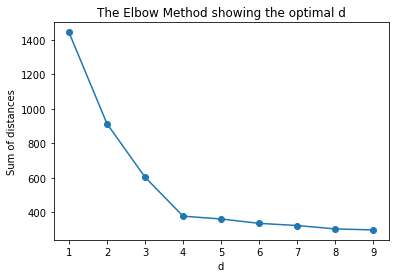

In [128]:
k = range(1, 10)
plt.plot(k, [dist_man(X, k) for k in range(1, 10)], marker='o')
plt.xlabel('d')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal d')
plt.show()

Количество итераций: 3


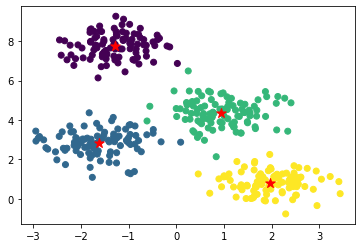

In [131]:
k = 4
centers = np.zeros((k, 2))
centers = X[np.random.choice(len(X), k)]
j = 1
centers, clusters, iter_ = KMeans(X, k, centers, j)
print("Количество итераций:", iter_)
fig, axs = plt.subplots()
axs.scatter(X[:, 0], X[:, 1], c=clusters)
axs.scatter(centers[:, 0], centers[:, 1], c='red', marker='*', s=100)
plt.show()